In [1]:
import json
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import math

from os import listdir
from os.path import isfile, join

from dataLoader import load_data_event
from statUtils import perform_regression

sns.set_style('whitegrid')

In [2]:
# load in all the downloaded data
data_dir = 'data/week2/'
saved_data_files = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]
events = [f"week2/{i[:-5]}" for i in saved_data_files]
events

['week2/2020gadal',
 'week2/2020mabri',
 'week2/2020bcvi',
 'week2/2020onto3',
 'week2/2020arli',
 'week2/2020mdbet',
 'week2/2020misjo',
 'week2/2020txcha',
 'week2/2020mijac',
 'week2/2020inblo',
 'week2/2020mndu',
 'week2/2020qcsh',
 'week2/2020ctwat',
 'week2/2020vagle',
 'week2/2020mimil',
 'week2/2020tuis',
 'week2/2020ncpem',
 'week2/2020mike2',
 'week2/2020onbar',
 'week2/2020cala',
 'week2/2020txpla',
 'week2/2020mndu2',
 'week2/2020cadm',
 'week2/2020waspo',
 'week2/2020txdel',
 'week2/2020utwv',
 'week2/2020ilch',
 'week2/2020mikng']

In [18]:
# load into dataframes
qualification_matches_week_2, team_scores_week_2, team_data_week_2, team_component_opr_week_2 = load_data_event(events[0])
for event in events[1:]:
    event_qualification_matches, event_team_scores, event_team_data, event_team_component_opr = load_data_event(event)
    qualification_matches_week_2 = pd.concat([qualification_matches_week_2, event_qualification_matches])
    team_scores_week_2 = pd.concat([team_scores_week_2, event_team_scores])
    team_data_week_2 = pd.concat([team_data_week_2, event_team_data])
    team_component_opr_week_2 = pd.concat([team_component_opr_week_2, event_team_component_opr])
qualification_matches_week_2
team_component_opr_week_2

,team_key,matches_played,points_scored,points_scored_std,cells_bottom_auto,cells_bottom_auto_std,cells_bottom_teleop,cells_bottom_teleop_std,cells_inner_auto,cells_inner_auto_std,cells_inner_teleop,cells_inner_teleop_std,cells_outer_auto,cells_outer_auto_std,cells_outer_teleop,cells_outer_teleop_std,mean_endgame,mean_score
0,frc1102,12,55.015220,18.851101,-0.111623,0.294198,-0.536588,1.509438,0.196522,0.361686,0.343675,0.694347,2.937523,0.883843,6.397633,2.469784,20.000000,96.500000
1,frc1311,12,30.731253,23.402091,-0.036147,0.156146,0.728220,1.420681,0.190628,0.580299,0.976167,2.366931,-0.354563,0.589076,1.272643,3.125061,16.250000,77.000000
2,frc1771,12,61.560707,20.367695,-0.137373,0.170392,-0.157470,0.872232,0.391186,0.817107,1.740691,1.705282,2.987554,1.482723,6.847973,3.276957,20.000000,107.500000
3,frc1795,12,7.360120,16.497112,-0.072511,0.161271,7.061306,5.140229,0.208454,1.309690,-0.128767,1.266230,-0.048603,0.877019,-0.936307,1.407074,3.333333,50.916667
4,frc2974,12,55.627928,20.552998,0.009355,0.135118,-1.346746,4.150693,1.983184,1.712490,3.613474,2.596232,1.492296,1.555757,9.121289,4.147174,10.416667,91.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,frc7823,12,17.696119,29.894732,0.202368,0.824534,0.737253,1.618277,-0.043195,0.777615,-0.655827,1.306533,0.131301,0.979522,-0.069011,4.029923,5.000000,59.416667
36,frc7827,12,5.951949,15.065297,0.370785,0.908820,1.250654,2.581584,-0.029606,0.435046,-0.229348,0.692298,0.110355,0.959838,-0.048893,2.044662,2.916667,50.750000
37,frc8382,12,8.412189,10.593703,0.030261,0.552640,0.877033,1.131237,0.127030,0.648875,0.023420,1.427444,0.073663,0.904014,0.324486,1.870372,6.250000,57.000000
38,frc8425,12,17.875422,18.430376,0.136093,0.832910,7.615607,5.309516,-0.151694,0.472549,0.098294,1.204578,-0.094829,1.241249,0.027360,2.708130,15.416667,74.000000


In [20]:
# save dataframes so that we don't have to recalculate component OPR
qualification_matches_week_2.to_csv('data/saved_dataframes/week-2-qualification-matches.csv')
team_scores_week_2.to_csv('data/saved_dataframes/week-2-team-scores.csv')
team_data_week_2.to_csv('data/saved_dataframes/week-2-team-data.csv')
team_component_opr_week_2.to_csv('data/saved_dataframes/week-2-team-component-opr.csv')

In [41]:
# and for future me, just load them here
qualification_matches_week_2 = pd.read_csv('data/saved_dataframes/week-2-qualification-matches.csv')
team_scores_week_2 = pd.read_csv('data/saved_dataframes/week-2-team-scores.csv')
team_data_week_2 = pd.read_csv('data/saved_dataframes/week-2-team-data.csv')
team_component_opr_week_2 = pd.read_csv('data/saved_dataframes/week-2-team-component-opr.csv')

The first thing that we need to do with this data is see if it is significantly different from the data from week one. If it isn't, than we can (safely) conglomerate the two in order to improve our model and give ourselves more data to work with.

In [40]:
# load in week 1 data to compare
qualification_matches_week_1 = pd.read_csv('data/saved_dataframes/week-1-qualification-matches.csv')
team_scores_week_1 = pd.read_csv('data/saved_dataframes/week-1-team-scores.csv')
team_data_week_1 = pd.read_csv('data/saved_dataframes/week-1-team-data.csv')
team_component_opr_week_1 = pd.read_csv('data/saved_dataframes/week-1-team-component-opr.csv')

In [42]:
# merge dataframes to compare with each other
qualification_matches_week_1['week'] = 1
team_scores_week_1['week'] = 1
team_data_week_1['week'] = 1
team_component_opr_week_1['week'] = 1

qualification_matches_week_2['week'] = 2
team_scores_week_2['week'] = 2
team_data_week_2['week'] = 2
team_component_opr_week_2['week'] = 2

all_qualification_matches = qualification_matches_week_2.append(qualification_matches_week_1)
all_team_scores = team_scores_week_2.append(team_scores_week_1)
all_team_data = team_data_week_2.append(team_data_week_1)
all_team_component_opr = team_component_opr_week_2.append(team_component_opr_week_1)

all_team_component_opr

,Unnamed: 0,team_key,matches_played,points_scored,points_scored_std,cells_bottom_auto,cells_bottom_auto_std,cells_bottom_teleop,cells_bottom_teleop_std,cells_inner_auto,cells_inner_auto_std,cells_inner_teleop,cells_inner_teleop_std,cells_outer_auto,cells_outer_auto_std,cells_outer_teleop,cells_outer_teleop_std,mean_endgame,mean_score,week
0,0,frc1102,12,55.015220,18.851101,-0.111623,0.294198,-0.536588,1.509438,0.196522,0.361686,0.343675,0.694347,2.937523,0.883843,6.397633,2.469784,20.000000,96.500000,2
1,1,frc1311,12,30.731253,23.402091,-0.036147,0.156146,0.728220,1.420681,0.190628,0.580299,0.976167,2.366931,-0.354563,0.589076,1.272643,3.125061,16.250000,77.000000,2
2,2,frc1771,12,61.560707,20.367695,-0.137373,0.170392,-0.157470,0.872232,0.391186,0.817107,1.740691,1.705282,2.987554,1.482723,6.847973,3.276957,20.000000,107.500000,2
3,3,frc1795,12,7.360120,16.497112,-0.072511,0.161271,7.061306,5.140229,0.208454,1.309690,-0.128767,1.266230,-0.048603,0.877019,-0.936307,1.407074,3.333333,50.916667,2
4,4,frc2974,12,55.627928,20.552998,0.009355,0.135118,-1.346746,4.150693,1.983184,1.712490,3.613474,2.596232,1.492296,1.555757,9.121289,4.147174,10.416667,91.083333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,31,frc6420,12,15.033776,14.212169,0.134289,0.173429,1.555320,1.736087,-0.512904,0.498855,-0.262316,1.122342,0.631215,0.790844,0.632809,3.044985,4.166667,79.000000,1
911,32,frc6805,12,23.097641,23.301286,0.107642,0.242962,-0.002293,0.716302,0.398861,0.567402,0.237176,0.834792,1.116560,1.731574,2.371266,4.420771,1.666667,77.583333,1
912,33,frc6843,12,24.520482,19.795723,2.739274,0.863999,1.450874,2.459283,-0.154907,0.572409,-0.226112,0.641718,0.713868,1.305005,0.485671,2.121216,2.916667,81.750000,1
913,34,frc6886,12,34.434515,14.256964,0.023384,0.205258,-0.364778,1.202902,0.619001,1.159672,0.707401,0.893943,0.709097,1.515481,1.066854,1.414527,13.333333,93.750000,1


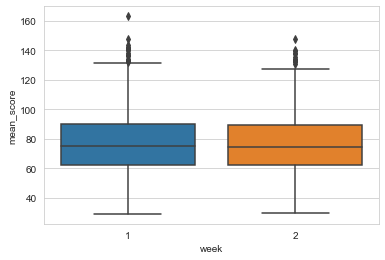

In [51]:
# let's look at boxplots to start
sns.boxplot(x='week', y='mean_score', data=all_team_component_opr)

In [22]:
# run a test to see if they are different distributions (or from different sample)
# use a 2 sample one of these https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test
ks_test = stats.ks_2samp(
    all_team_component_opr.loc[all_team_component_opr['week'] == 1]['mean_score'].values,
    all_team_component_opr.loc[all_team_component_opr['week'] == 2]['mean_score'].values
)
ks_test

Ks_2sampResult(statistic=0.025703689843933657, pvalue=0.8791673461828996)

- H_0: The two samples (week 1 scores and week 2 scores) are the same
- H_a: The two samples are different

p=.87, p<$\alpha$, we can't reject the null hypothesis

There is no evidence to support that week 1 and week 2 scores are significantly different distributions

In [24]:
# now that we know that the two distributions are the same, we can use the conglomerated data together
# we're going to now normalize the component OPR and repeat analysis from before
qualification_matches = all_qualification_matches
team_component_opr = all_team_component_opr
team_data = all_team_data
team_scores = all_team_scores

# go ahead and save these so that we can just skip to here in the future
qualification_matches.to_csv('data/saved_dataframes/week-1-2-qualification-matches.csv')
team_scores.to_csv('data/saved_dataframes/week-1-2-team-scores.csv')
team_data.to_csv('data/saved_dataframes/week-1-2-team-data.csv')
team_component_opr.to_csv('data/saved_dataframes/week-1-2-team-component-opr.csv')

In [2]:
# and load them to skip previous stuff
qualification_matches = pd.read_csv('data/saved_dataframes/week-1-2-qualification-matches.csv')
team_scores = pd.read_csv('data/saved_dataframes/week-1-2-team-scores.csv')
team_data = pd.read_csv('data/saved_dataframes/week-1-2-team-data.csv')
team_component_opr = pd.read_csv('data/saved_dataframes/week-1-2-team-component-opr.csv')

In [3]:
# normalize component OPRs
team_component_opr_normalized = team_component_opr.copy(deep=True)
team_component_opr_normalized['cells_bottom_auto'] *= 2
team_component_opr_normalized['cells_bottom_teleop'] *= 1
team_component_opr_normalized['cells_inner_auto'] *= 6
team_component_opr_normalized['cells_inner_teleop'] *= 3
team_component_opr_normalized['cells_outer_auto'] *= 4
team_component_opr_normalized['cells_outer_teleop'] *= 2

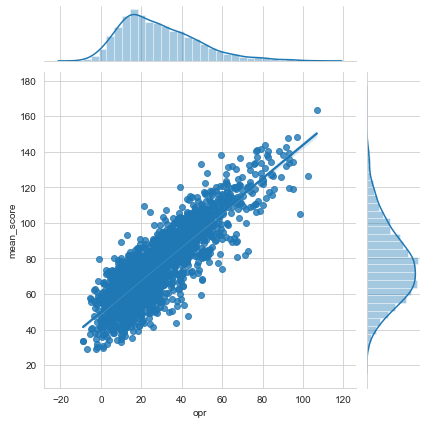

In [4]:
# opr/team data joint plot (just to make sure things exist)
sns.jointplot('opr', 'mean_score', data=team_data, kind='reg')

We can now start building our model from the ground up, taking standard deviations into account. The model itself will be tuned/the coefficients will be found through a linear regression (much like before), but I'll take those and pass them into a new computational model that takes the standard deviation into account (basically combine deviations when running the model to give a final mean/std output of score)

In [5]:
# custom score prediction model
class ScorePredictor:
    def __init__(self, features_in, oprs):
        self.features_in = features_in
        self._build_model(oprs)

    def _build_model(self, oprs):
        self.full_feature_regression, self.r2 = perform_regression(oprs, self.features_in, 'mean_score')
        self.reg_coef = {f: self.full_feature_regression.coef_[i] for i, f in enumerate(self.features_in)}
        self.reg_coef = {k: v for k, v in sorted(self.reg_coef.items(), key=lambda i: i[1])}
        self.intercept = self.full_feature_regression.intercept_
        self.n_trained = oprs.shape[0]

    def _get_prediction_values(self, team_key, oprs):
        mean_outputs = []
        deviations = []
        team_oprs = oprs.loc[oprs['team_key'] == team_key].iloc[-1]
        for feature in self.features_in:
            mean_outputs.append(team_oprs[feature] * self.reg_coef[feature])
            if f'{feature}_std' in team_oprs:
                deviations.append(team_oprs[f'{feature}_std'] * self.reg_coef[feature])
        mean_outputs = np.array(mean_outputs)
        deviations = np.array(deviations)
    
        predicted_score_mean = np.sum(mean_outputs) + self.intercept
        predicted_score_deviation = np.sqrt(np.sum(deviations**2))
    
        return predicted_score_mean, predicted_score_deviation
    
    def predict_team(self, team_key, confidence, oprs, team_data):
        mean, std = self._get_prediction_values(team_key, oprs)
        n = oprs.loc[oprs['team_key'] == team_key].iloc[-1]['matches_played']
        t_value = stats.t.ppf(confidence, n)
        se = math.sqrt(
            ((n+1) * std**2 + (mean - team_data.loc[team_data['team_key'] == team_key].iloc[-1]['mean_score'])**2)
            /n
        )
        interval = t_value*se
        return mean, interval
    
    def predict_alliance(self, team_keys, confidence, oprs, team_data):
        means = []
        stds = []
        for team in team_keys:
            team_mean, team_std= self._get_prediction_values(team, oprs)
            means.append(team_mean)
            stds.append(team_std)
        means, stds = np.array(means), np.array(stds)

        mean = np.mean(means)
        std = np.sqrt(np.sum(stds**2))

        n = 0
        mean_scores_observed = []
        for team in team_keys:
            n += oprs.loc[oprs['team_key'] == team].iloc[-1]['matches_played']
            mean_scores_observed.append(team_data.loc[team_data['team_key'] == team].iloc[-1]['mean_score'])
        mean_score_observed = np.mean(mean_scores_observed)
        t_value = stats.t.ppf(confidence, n)
        se = math.sqrt(
            ((n+1) * std**2 + (mean - mean_score_observed)**2)
            /n
        )
        interval = t_value*se
        return mean, interval

The standard error in the model above, when making a single team prediction, is found using the following:
$$\hat y \pm t^* \sqrt{\frac{ns^2 + s^2 + (x^* - \bar x )^2}{n}}$$

This is, of course (lul), derived from
$$\hat y \pm t^* SE$$
$$SE = s \sqrt{1 + \frac{1}{n} + \frac{(x^* - \bar x)^2}{\Sigma (x - \bar x)^2}}$$
$$s = \sqrt{\frac{\Sigma (x - \bar x)^2}{n}}$$
and a bit of algebraic substitution

The exact formula and derivation of it is sus and somewhat taken from page 544 of "The Basic Practice of Statistics, Second Edition" by David S. Moore. (if you want to cross check or some nonsense)

In [6]:
full_features = ['cells_bottom_auto', 'cells_bottom_teleop', 'cells_inner_auto', 'cells_inner_teleop', 'cells_outer_auto', 'cells_outer_teleop', 'mean_endgame']
score_model = ScorePredictor(full_features, team_component_opr_normalized)
print(f'R^2: {score_model.r2}')

R^2: 0.7416686738811513


In [7]:
score_model.predict_team('frc5160', .95, team_component_opr_normalized, team_data)

(98.55606639309063, 11.327876973391255)

In [8]:
# yuh
score_model.predict_alliance(['frc5160', 'frc5511', 'frc7763'], .95, team_component_opr_normalized, team_data)

(84.35469100220777, 12.010910715968542)

Anyways, now that we have the model and it looks like it works, it's time to see if it actually works. We should be able to figure this out by doing some basic stats -- if we use 95% mean score intervals, than 95% of all team mean scores should fall within it.

In [31]:
confidence_results = []
for confidence in range(66, 99):
    percent_confidence = confidence / 100
    correct_predictions = total_predictions = 0
    for _, team in team_data.iterrows():
        predicted_mean, predicted_interval = score_model.predict_team(team['team_key'], percent_confidence, team_component_opr_normalized, team_data)
        actual_mean = team['mean_score']
        if -predicted_interval < (actual_mean - predicted_mean) < predicted_interval:
            correct_predictions += 1
        total_predictions += 1
    percent_accuracy = correct_predictions / total_predictions
    confidence_results.append([percent_confidence, percent_accuracy])
confidence_results_df = pd.DataFrame(confidence_results, columns=['percent_confidence', 'percent_accuracy'])
confidence_results_df

,percent_confidence,percent_accuracy
0,0.66,0.160662
1,0.67,0.171373
2,0.68,0.180136
3,0.69,0.189873
4,0.70,0.206913
5,0.71,0.213729
6,0.72,0.228822
7,0.73,0.239046
8,0.74,0.251704
9,0.75,0.260467


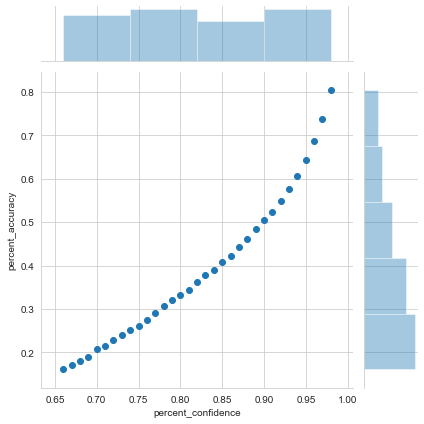

In [53]:
sns.jointplot('percent_confidence', 'percent_accuracy', data=confidence_results_df)

Looking at the distribution and things that I just graphed, it looks like our model (obviously) performs much better when we have a higher confidence. The worrying(ish) thing is that it doesn't look like it performs _that_ well overall. I think the next step is going to be looking at it from the context of looking at all of the matches in a tournament to see if we can predict their scores with good enough accuracy to use.

In [10]:
tournament_investigating = '2020ncpem'
investigating_tournament_matches, _, _, _ = load_data_event(f'week2/{tournament_investigating}')
investigating_tournament_matches

,match_key,match_type,match_number,blue_1_key,blue_2_key,blue_3_key,blue_keys,blue_endgame_level,blue_foul_count,blue_points_scored,...,red_3_init_line,red_1_endgame,red_2_endgame,red_3_endgame,red_cells_bottom_auto,red_cells_bottom_teleop,red_cells_outer_auto,red_cells_outer_teleop,red_cells_inner_auto,red_cells_inner_teleop
13,2020ncpem_qm1,qm,1,frc7463,frc3336,frc2640,"[frc7463, frc3336, frc2640]",False,0,33,...,0,0,5,0,0,0,3,1,0,0
14,2020ncpem_qm10,qm,10,frc435,frc8030,frc6512,"[frc435, frc8030, frc6512]",False,0,35,...,5,25,0,5,3,0,0,0,0,0
15,2020ncpem_qm11,qm,11,frc2682,frc4290,frc4935,"[frc2682, frc4290, frc4935]",False,5,48,...,0,5,25,25,0,10,1,0,1,0
16,2020ncpem_qm12,qm,12,frc4534,frc3336,frc6177,"[frc4534, frc3336, frc6177]",True,0,66,...,0,5,5,0,0,1,1,6,0,0
17,2020ncpem_qm13,qm,13,frc1533,frc6729,frc2640,"[frc1533, frc6729, frc2640]",False,0,97,...,0,5,0,0,0,0,0,1,0,0
18,2020ncpem_qm14,qm,14,frc8030,frc3822,frc8304,"[frc8030, frc3822, frc8304]",True,1,24,...,5,0,25,0,0,6,0,0,1,0
19,2020ncpem_qm15,qm,15,frc3737,frc7463,frc2655,"[frc3737, frc7463, frc2655]",False,0,91,...,0,0,5,0,0,0,2,0,1,0
20,2020ncpem_qm16,qm,16,frc4795,frc2640,frc435,"[frc4795, frc2640, frc435]",True,0,105,...,0,0,5,25,0,0,1,10,0,4
21,2020ncpem_qm17,qm,17,frc3196,frc8030,frc6214,"[frc3196, frc8030, frc6214]",True,0,44,...,0,25,25,0,0,9,1,2,0,1
22,2020ncpem_qm18,qm,18,frc4534,frc8315,frc4290,"[frc4534, frc8315, frc4290]",False,0,80,...,0,25,25,0,2,15,0,0,0,0


In [11]:
match_predictions = []
for _, match in investigating_tournament_matches.iterrows():
    for confidence in range(99, 0, -1):
        confidence_percent = confidence / 100
        red_mean, red_std = score_model.predict_alliance(match['red_keys'], confidence_percent, team_component_opr_normalized, team_data)
        blue_mean, blue_std = score_model.predict_alliance(match['blue_keys'], confidence_percent, team_component_opr_normalized, team_data)
        red_interval = (red_mean-red_std, red_mean+red_std)
        blue_interval = (blue_mean-blue_std, blue_mean+blue_std)
        if not ((blue_interval[0] < red_interval[0] < blue_interval[1]) or blue_interval[0] < red_interval[1] < blue_interval[1]):
            break
    predicted_victor = 'red' if red_interval[0] > blue_interval[1] else 'blue'
    actual_victor = 'red' if match['red_points_scored'] > match['blue_points_scored'] else 'blue'
    match_predictions.append([match['match_number'], confidence_percent, predicted_victor, actual_victor])
match_predictions_df = pd.DataFrame(match_predictions, columns=['match_number', 'confidence', 'predicted_victor','actual_victor'])
match_predictions_df

,match_number,confidence,predicted_victor,actual_victor
0,1,0.99,blue,blue
1,10,0.50,red,red
2,11,0.60,red,red
3,12,0.92,blue,blue
4,13,0.90,blue,blue
5,14,0.83,red,red
6,15,0.78,blue,blue
7,16,0.78,red,blue
8,17,0.86,red,red
9,18,0.99,blue,blue


In [15]:
missed_predictions = match_predictions_df.loc[match_predictions_df['predicted_victor'] != match_predictions_df['actual_victor']]
correct_predictions = match_predictions_df.loc[match_predictions_df['predicted_victor'] == match_predictions_df['actual_victor']]

print(f"% accuracy for tournament: {correct_predictions.shape[0]/match_predictions_df.shape[0]}")
missed_predictions

% accuracy for tournament: 0.8103448275862069


,match_number,confidence,predicted_victor,actual_victor
7,16,0.78,red,blue
11,2,0.67,red,blue
14,22,0.63,blue,red
26,33,0.60,blue,red
29,36,0.66,red,blue
30,37,0.77,red,blue
32,39,0.52,blue,red
34,40,0.56,red,blue
35,41,0.74,red,blue
39,45,0.70,red,blue


81% accuracy across all matches!!! that's pretty nice to be able to predict.